<a href="https://colab.research.google.com/github/mariagichomo/Fraud-detection/blob/main/Fraud_detection_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from matplotlib import pylab

# Load Data

In [43]:
client_df = pd.read_csv("drive/MyDrive/Data/train/client_train.csv")


In [44]:
client_df.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [45]:
invoice_df = pd.read_csv("drive/MyDrive/Data/train/invoice_train.csv",low_memory=False)

In [46]:
invoice_df.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


## Data Exploration

In [47]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [48]:
invoice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [49]:
# check missing value
client_df.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [50]:
# check missing value
invoice_df.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [51]:
client_df.duplicated().values.any()

False

In [52]:
invoice_df.duplicated().values.any()

True

In [53]:
duplicates =invoice_df.duplicated()

In [54]:
# Count the number of duplicate rows
num_duplicates = duplicates.sum()

print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 11


In [55]:
duplicates_mask = invoice_df.duplicated(keep=False)

# Use the mask to filter and print the duplicated rows
duplicated_rows = invoice_df[duplicates_mask]
duplicated_rows

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
951890,train_Client_125864,2011-12-12,11,101545,5,413,6,1,0,0,0,0,13680,13680,2,ELEC
951893,train_Client_125864,2011-12-12,11,101545,5,413,6,1,0,0,0,0,13680,13680,2,ELEC
1755789,train_Client_25894,2010-07-13,40,6986740,5,5,6,1,0,0,0,0,0,0,2,GAZ
1755798,train_Client_25894,2010-07-13,40,6986740,5,5,6,1,0,0,0,0,0,0,2,GAZ
2137995,train_Client_3636,2012-01-18,40,312650,5,5,6,1,0,0,0,0,623,623,2,GAZ
2137999,train_Client_3636,2012-01-18,40,312650,5,5,6,1,0,0,0,0,623,623,2,GAZ
2163371,train_Client_37069,2010-10-11,11,5284,5,413,6,1,0,0,0,0,99429,99429,2,ELEC
2163374,train_Client_37069,2010-10-11,11,5284,5,413,6,1,0,0,0,0,99429,99429,2,ELEC
2433907,train_Client_44407,2008-02-28,11,66921,5,203,6,1,0,0,0,0,0,0,2,ELEC
2433919,train_Client_44407,2008-02-28,11,66921,5,203,6,1,0,0,0,0,0,0,2,ELEC


In [56]:

#drop duplicates
invoice_df.drop_duplicates(inplace=True)


In [57]:
# Count the number of duplicate rows
duplicates =invoice_df.duplicated()
num_duplicates = duplicates.sum()

print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


### Test Data

In [58]:
client_data = {
    'client_id': [1, 2, 3, 4],
    'client_name': ['Client A', 'Client B', 'Client C', 'Client D']
}

# Sample invoice data
invoice_data = {
    'client_id': [1, 2, 1, 3, 4],
    'invoice_number': [101, 102, 103, 104, 105],
    'amount': [500, 300, 700, 200, 900]
}

# Creating DataFrames from the sample data
client = pd.DataFrame(client_data)
invoice = pd.DataFrame(invoice_data)



In [59]:
client.head()

,client_id,client_name
0,1,Client A
1,2,Client B
2,3,Client C
3,4,Client D


In [60]:
invoice

,client_id,invoice_number,amount
0,1,101,500
1,2,102,300
2,1,103,700
3,3,104,200
4,4,105,900


In [61]:
# Merging the two datasets based on 'client_id'
merged_df = pd.merge(client, invoice, on='client_id', how='left')

In [62]:
merged_df

,client_id,client_name,invoice_number,amount
0,1,Client A,101,500
1,1,Client A,103,700
2,2,Client B,102,300
3,3,Client C,104,200
4,4,Client D,105,900


In [63]:
grouped_df = merged_df.groupby('client_id').agg({
    'client_name': 'first',
    'invoice_number': 'size',
    'amount': 'sum'
}).reset_index()


In [64]:
grouped_df

,client_id,client_name,invoice_number,amount
0,1,Client A,2,1200
1,2,Client B,1,300
2,3,Client C,1,200
3,4,Client D,1,900


## End of Test Data

## Merge our Dataset

In [65]:
df2 = pd.merge(client_df, invoice_df, on='client_id', how='left')

In [66]:
df2

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476733,60,train_Client_99998,11,101,22/12/1993,0.0,2005-08-19,10,1253571,0,...,9,1,400,135,0,0,3197,3732,8,ELEC
4476734,60,train_Client_99998,11,101,22/12/1993,0.0,2005-12-19,10,1253571,0,...,6,1,200,6,0,0,3732,3938,4,ELEC
4476735,60,train_Client_99999,11,101,18/02/1986,0.0,1996-09-25,11,560948,0,...,6,1,259,0,0,0,13884,14143,4,ELEC
4476736,60,train_Client_99999,11,101,18/02/1986,0.0,1996-05-28,11,560948,0,...,6,1,603,0,0,0,13281,13884,4,ELEC


In [67]:
df2.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

In [68]:
df2.rename(columns ={'disrict':'district'},inplace = True )

In [69]:
df2.dtypes

district                  int64
client_id                object
client_catg               int64
region                    int64
creation_date            object
target                  float64
invoice_date             object
tarif_type                int64
counter_number            int64
counter_statue           object
counter_code              int64
reading_remarque          int64
counter_coefficient       int64
consommation_level_1      int64
consommation_level_2      int64
consommation_level_3      int64
consommation_level_4      int64
old_index                 int64
new_index                 int64
months_number             int64
counter_type             object
dtype: object

In [70]:
df2['target'] = df2['target'].astype(int)

In [71]:
df2['counter_type'].value_counts()

ELEC    3079398
GAZ     1397340
Name: counter_type, dtype: int64

In [72]:
df2['creation_date']= df2['creation_date'].astype('datetime64[ns]')

<ipython-input-72-1a8b9bd01d86>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2['creation_date']= df2['creation_date'].astype('datetime64[ns]')


In [73]:
df2['invoice_date'] = df2['invoice_date'].astype('datetime64[ns]')

In [74]:
df2

,district,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,1994-12-31,0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,1994-12-31,0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,1994-12-31,0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,1994-12-31,0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,1994-12-31,0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476733,60,train_Client_99998,11,101,1993-12-22,0,2005-08-19,10,1253571,0,...,9,1,400,135,0,0,3197,3732,8,ELEC
4476734,60,train_Client_99998,11,101,1993-12-22,0,2005-12-19,10,1253571,0,...,6,1,200,6,0,0,3732,3938,4,ELEC
4476735,60,train_Client_99999,11,101,1986-02-18,0,1996-09-25,11,560948,0,...,6,1,259,0,0,0,13884,14143,4,ELEC
4476736,60,train_Client_99999,11,101,1986-02-18,0,1996-05-28,11,560948,0,...,6,1,603,0,0,0,13281,13884,4,ELEC


In [75]:
df2['duration_invoice'] = df2['invoice_date'].max() - df2['creation_date']


In [76]:
df2

,district,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,duration_invoice
0,60,train_Client_0,11,101,1994-12-31,0,2014-03-24,11,1335667,0,...,1,82,0,0,0,14302,14384,4,ELEC,9107 days
1,60,train_Client_0,11,101,1994-12-31,0,2013-03-29,11,1335667,0,...,1,1200,184,0,0,12294,13678,4,ELEC,9107 days
2,60,train_Client_0,11,101,1994-12-31,0,2015-03-23,11,1335667,0,...,1,123,0,0,0,14624,14747,4,ELEC,9107 days
3,60,train_Client_0,11,101,1994-12-31,0,2015-07-13,11,1335667,0,...,1,102,0,0,0,14747,14849,4,ELEC,9107 days
4,60,train_Client_0,11,101,1994-12-31,0,2016-11-17,11,1335667,0,...,1,572,0,0,0,15066,15638,12,ELEC,9107 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476733,60,train_Client_99998,11,101,1993-12-22,0,2005-08-19,10,1253571,0,...,1,400,135,0,0,3197,3732,8,ELEC,9481 days
4476734,60,train_Client_99998,11,101,1993-12-22,0,2005-12-19,10,1253571,0,...,1,200,6,0,0,3732,3938,4,ELEC,9481 days
4476735,60,train_Client_99999,11,101,1986-02-18,0,1996-09-25,11,560948,0,...,1,259,0,0,0,13884,14143,4,ELEC,12345 days
4476736,60,train_Client_99999,11,101,1986-02-18,0,1996-05-28,11,560948,0,...,1,603,0,0,0,13281,13884,4,ELEC,12345 days


In [77]:
grouped_df2 = df2.groupby('client_id').agg({
    'district': 'first',
    'client_catg':'first',
    'region':'first',
    'creation_date':'first',
    'invoice_date':'size',
    'tarif_type': 'first',
    'counter_number': 'first',
    'counter_statue': 'first',
    'consommation_level_1':'sum',
    'consommation_level_2': 'sum',
    'consommation_level_3':'sum',
    'consommation_level_4':'sum',
    'target':'first',
    'months_number':'sum',
    'counter_type': 'first',
    'duration_invoice':'first'
}).reset_index()

In [78]:
grouped_df2

,client_id,district,client_catg,region,creation_date,invoice_date,tarif_type,counter_number,counter_statue,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,target,months_number,counter_type,duration_invoice
0,train_Client_0,60,11,101,1994-12-31,35,11,1335667,0,12334,370,0,0,0,162,ELEC,9107 days
1,train_Client_1,69,11,107,2002-05-29,37,11,678902,0,20629,0,0,0,0,160,ELEC,6401 days
2,train_Client_10,62,11,301,1986-03-13,18,11,572765,0,14375,682,0,0,0,116,ELEC,12322 days
3,train_Client_100,69,11,105,1996-11-07,20,11,2078,0,24,0,0,0,0,84,ELEC,8430 days
4,train_Client_1000,62,11,303,2014-10-14,14,11,19575,0,9292,1468,1643,514,0,52,ELEC,1880 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,train_Client_99995,62,11,304,2004-07-26,71,11,897286,0,139,0,0,0,0,300,ELEC,5612 days
135489,train_Client_99996,63,11,311,2012-10-25,41,11,398783,0,7620,31,0,0,0,160,ELEC,2599 days
135490,train_Client_99997,63,11,311,2011-11-22,36,11,262195,0,9831,0,0,0,0,148,ELEC,2937 days
135491,train_Client_99998,60,11,101,1993-12-22,2,10,1253571,0,600,141,0,0,0,12,ELEC,9481 days


In [79]:
grouped_df2.rename(columns ={'invoice_date':'invoice_count'},inplace = True )

In [80]:
# DATA VISUALIZATION

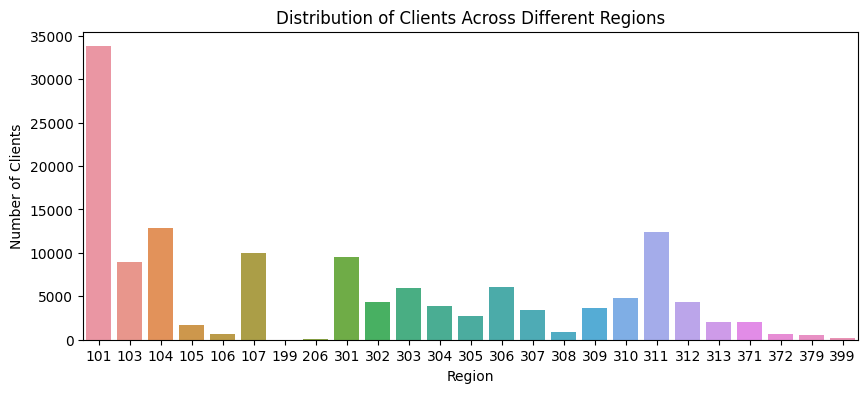

In [93]:
#Distribution of clients across different regions
plt.figure(figsize=(10,4))
sns.countplot(x='region', data= grouped_df2)
plt.title('Distribution of Clients Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Number of Clients')
plt.show()